In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from time import sleep
import os
import pywt
import warnings
import sklearn
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from keras_preprocessing.sequence import pad_sequences
import keras
import tensorflow as tf
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras import optimizers
from tensorflow.keras import layers
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.svm import SVC
%matplotlib inline
warnings.filterwarnings("ignore",category=np.VisibleDeprecationWarning)

In [2]:
dirB="./Datasets/setB/"
tempB=[]
for file in os.listdir(dirB):
    fl = dirB + file
    tempB.append(fl)
tempB = sorted(tempB)

dirE="./Datasets/setE/"
tempE=[]
for file in os.listdir(dirE):
    fl = dirE + file
    tempE.append(fl)
tempE = sorted(tempE)

In [3]:
tb=[]
st = 'A'
for i in range(len(tempB)):
    x = pd.read_table(tempB[i],header=None)
    x.columns=[st+str(i)]
    tb.append(x)
    
te=[]
st = 'A'
for i in range(len(tempE)):
    x = pd.read_table(tempE[i],header=None)
    x.columns=[st+str(i)]
    te.append(x)

In [4]:
def table(table):
    big_table=None
    for tf in table:
        big_table=pd.concat([big_table,tf],axis=1)
    return big_table

In [5]:
bigB=table(tb)
bigE=table(te)

head=list(bigB.columns.values)

In [6]:
def creat_mat(mat):
    matx = np.zeros((len(mat),(len(head))))
    for i in range(len(head)):
        matx[:,i] = mat[head[i]]
        sleep(0.01)
    return matx

In [7]:
matB=creat_mat(bigB)
matE=creat_mat(bigE)

In [8]:
matB=np.nan_to_num(matB)
matE=np.nan_to_num(matE)

In [9]:
matB.shape,matE.shape

((4097, 100), (4097, 100))

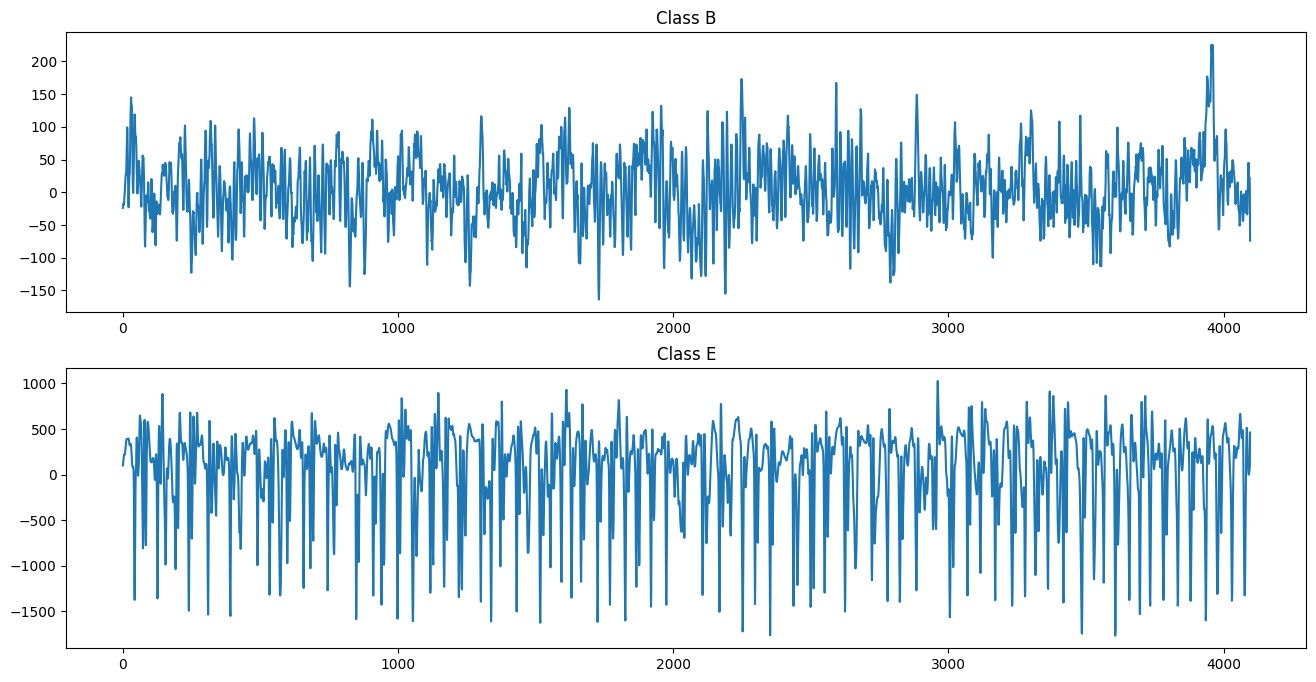

In [10]:
samples=np.arange(0,4097,1)
plt.figure(figsize=(16,8))
plt.subplot(2,1,1)
plt.title('Class B')
plt.plot(samples,matB[:,0],label='Non_Seizure')
plt.subplot(2,1,2)
plt.title('Class E')
plt.plot(samples,matE[:,0],label='Seizure')
plt.show()

In [11]:
feature_size = 8
columns_name = list()
for i in range(feature_size):
    columns_name = columns_name + ['f'+str(i+1)]
columns_name = columns_name + ['class']

In [12]:
def features(mat):
  Fs   = 173
  fft = np.fft.fft(mat)
  mat = np.fft.ifft(fft[0:1500])
  mat = abs(np.fft.ifft(fft[0:1000]))
  lis = list()
  lis = lis + [np.max(abs(fft))]
  lis = lis + [np.min(abs(fft))]
  lis = lis + [np.mean(abs(fft))]
  lis = lis + [np.std(abs(fft))]
  lis = lis + [np.max(mat)]
  lis = lis + [np.min(mat)]
  lis = lis + [np.mean(mat)]
  lis = lis + [np.std(mat)]
  sleep(0.01)
             
  return lis

In [13]:
MftB = np.zeros((100,feature_size + 1))

for i in range(100):
    MftB[i,:] = features(matB[:,i]) + [1]

In [14]:
MftE = np.zeros((100,feature_size + 1))

for i in range(100):
    MftE[i,:] = features(matE[:,i]) + [0]

In [15]:
len(MftB),len(MftE)

(100, 100)

In [16]:
FCM_B = pd.DataFrame(MftB,columns=columns_name)
FCM_E = pd.DataFrame(MftE,columns=columns_name)

In [17]:
TotalDataset = pd.concat([FCM_B,FCM_E],ignore_index=True)

In [18]:
TotalDataset

,f1,f2,f3,f4,f5,f6,f7,f8,class
0,25949.454709,5.907827,1534.573278,2866.210888,526.454513,5.931969,129.343127,71.294761,1.0
1,34143.000000,4.459477,1408.411519,2762.615426,384.206542,1.701458,124.730955,68.443817,1.0
2,26556.252968,5.188324,1661.311389,3309.361641,581.219542,3.552666,146.977292,80.823932,1.0
3,36531.000000,6.264954,1870.503703,3759.104800,540.416633,5.622182,167.692428,92.849561,1.0
4,40030.079799,3.780446,1550.964860,3271.502408,486.830799,4.964520,142.266855,81.947939,1.0
...,...,...,...,...,...,...,...,...,...
195,182731.000000,4.140197,2964.034370,6900.671072,949.526909,7.628541,321.787517,169.284739,0.0
196,405933.567827,23.829796,12451.110052,33118.177387,3365.057684,584.042975,1497.708540,566.344367,0.0
197,206553.768555,13.807308,7000.972903,17431.403312,1554.877011,70.801519,785.302431,325.527149,0.0
198,186015.216714,22.248840,12069.225734,21179.101425,3292.508700,22.389188,897.583539,643.899324,0.0


In [19]:
X = TotalDataset[columns_name[:-1]]
Y = TotalDataset[['class']]
X = np.asarray(X)
Y = np.asarray(Y)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [21]:
st_x= StandardScaler()  
X_train= st_x.fit_transform(X_train)
X_test= st_x.transform(X_test)

In [22]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(160, 8)
(40, 8)
(160, 1)
(40, 1)


In [23]:
x_train=X_train.reshape(X_train.shape[0],8,1)
y_train=Y_train.reshape(Y_train.shape[0],1)
x_test=X_test.reshape(X_test.shape[0],8,1)
y_test=Y_test.reshape(Y_test.shape[0],1)

In [24]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(160, 8, 1)
(40, 8, 1)
(160, 1)
(40, 1)


In [25]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res

In [26]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_first")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(2, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)

In [27]:
input_shape = x_train.shape[1:]

In [28]:
x_train.shape[1:]

(8, 1)

In [29]:
model = build_model(
    input_shape,
    head_size=128,
    num_heads=2,
    ff_dim=2,
    num_transformer_blocks=2,
    mlp_units=[64],
    mlp_dropout=0.1,
    dropout=0.1,
)

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=1e-4),
    metrics=["sparse_categorical_accuracy"],
)
model.summary()

callbacks = [keras.callbacks.EarlyStopping(patience=15, restore_best_weights=True)]

history=model.fit(x_train,y_train,validation_split=0.2,epochs=200,batch_size=4,callbacks=callbacks,)

score=model.evaluate(x_test,y_test,batch_size=4)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 8, 1)]               0         []                            
                                                                                                  
 layer_normalization (Layer  (None, 8, 1)                 2         ['input_1[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 multi_head_attention (Mult  (None, 8, 1)                 1793      ['layer_normalization[0][0]', 
 iHeadAttention)                                                     'layer_normalization[0][0]'] 
                                                                                              

Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.3737 - sparse_categorical_accuracy: 0.8750 - val_loss: 0.3566 - val_sparse_categorical_accuracy: 0.9688
Epoch 9/200
32/32 [==============================] - 0s 4ms/step - loss: 0.3581 - sparse_categorical_accuracy: 0.8828 - val_loss: 0.3353 - val_sparse_categorical_accuracy: 0.9688
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 0.3405 - sparse_categorical_accuracy: 0.8750 - val_loss: 0.3154 - val_sparse_categorical_accuracy: 0.9688
Epoch 11/200
32/32 [==============================] - 0s 4ms/step - loss: 0.3383 - sparse_categorical_accuracy: 0.8750 - val_loss: 0.2981 - val_sparse_categorical_accuracy: 0.9688
Epoch 12/200
32/32 [==============================] - 0s 4ms/step - loss: 0.3255 - sparse_categorical_accuracy: 0.8828 - val_loss: 0.2832 - val_sparse_categorical_accuracy: 0.9688
Epoch 13/200
32/32 [==============================] - 0s 5ms/step - loss: 0.3146 - sparse_categorical_

32/32 [==============================] - 0s 4ms/step - loss: 0.1468 - sparse_categorical_accuracy: 0.9609 - val_loss: 0.0825 - val_sparse_categorical_accuracy: 1.0000
Epoch 54/200
32/32 [==============================] - 0s 4ms/step - loss: 0.1412 - sparse_categorical_accuracy: 0.9531 - val_loss: 0.0788 - val_sparse_categorical_accuracy: 1.0000
Epoch 55/200
32/32 [==============================] - 0s 4ms/step - loss: 0.1433 - sparse_categorical_accuracy: 0.9453 - val_loss: 0.0824 - val_sparse_categorical_accuracy: 1.0000
Epoch 56/200
32/32 [==============================] - 0s 3ms/step - loss: 0.1434 - sparse_categorical_accuracy: 0.9453 - val_loss: 0.0816 - val_sparse_categorical_accuracy: 1.0000
Epoch 57/200
32/32 [==============================] - 0s 4ms/step - loss: 0.1384 - sparse_categorical_accuracy: 0.9609 - val_loss: 0.0735 - val_sparse_categorical_accuracy: 1.0000
Epoch 58/200
32/32 [==============================] - 0s 4ms/step - loss: 0.1405 - sparse_categorical_accuracy: 0

32/32 [==============================] - 0s 8ms/step - loss: 0.0911 - sparse_categorical_accuracy: 0.9609 - val_loss: 0.0461 - val_sparse_categorical_accuracy: 1.0000
Epoch 99/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0756 - sparse_categorical_accuracy: 0.9844 - val_loss: 0.0486 - val_sparse_categorical_accuracy: 1.0000
Epoch 100/200
32/32 [==============================] - 0s 5ms/step - loss: 0.0811 - sparse_categorical_accuracy: 0.9844 - val_loss: 0.0440 - val_sparse_categorical_accuracy: 1.0000
Epoch 101/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0748 - sparse_categorical_accuracy: 0.9844 - val_loss: 0.0536 - val_sparse_categorical_accuracy: 1.0000
Epoch 102/200
32/32 [==============================] - 0s 6ms/step - loss: 0.0864 - sparse_categorical_accuracy: 0.9844 - val_loss: 0.0466 - val_sparse_categorical_accuracy: 1.0000
Epoch 103/200
32/32 [==============================] - 0s 4ms/step - loss: 0.0784 - sparse_categorical_accurac

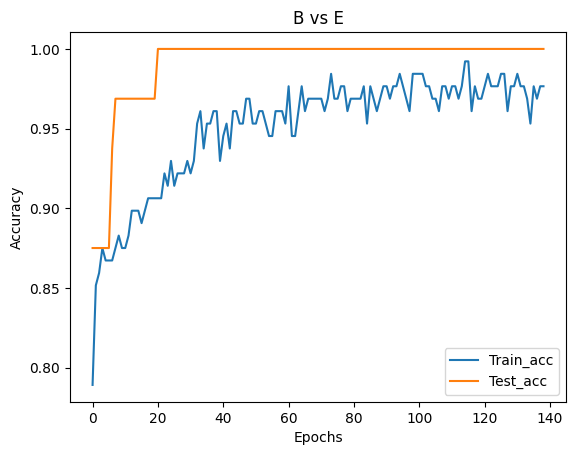

In [30]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('B vs E')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train_acc','Test_acc'],loc='best')
plt.show()

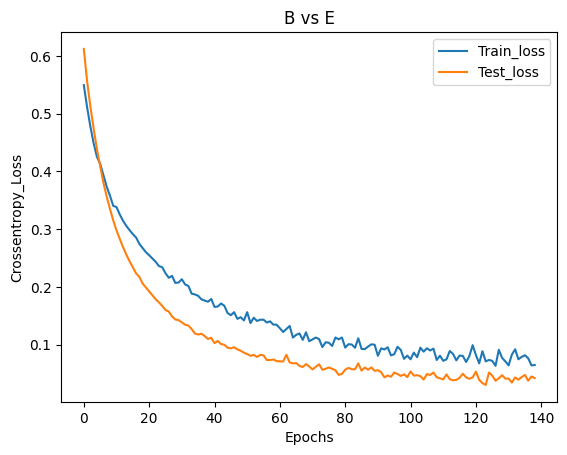

In [31]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('B vs E')
plt.xlabel('Epochs')
plt.ylabel('Crossentropy_Loss')
plt.legend(['Train_loss','Test_loss'],loc='best')
plt.show()

C:\Users\Sandeep\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


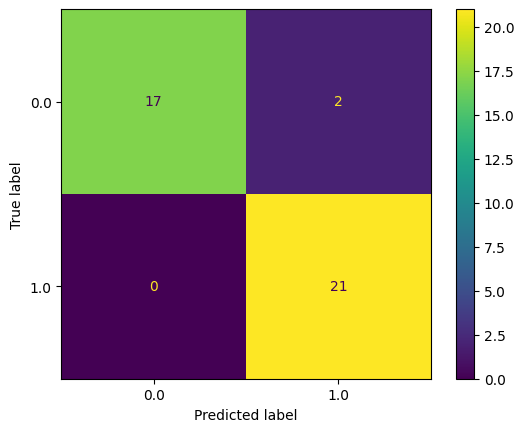

In [32]:
clf = SVC(random_state=0)
clf.fit(X_train, Y_train)
predictions = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()
plt.show()

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [34]:
print('Precision: %.3f' % precision_score(y_test, predictions))
print('Recall: %.3f' % recall_score(y_test, predictions))
print('Accuracy: %.3f' % accuracy_score(y_test, predictions))
print('F1 Score: %.3f' % f1_score(y_test, predictions))

Precision: 0.913
Recall: 1.000
Accuracy: 0.950
F1 Score: 0.955


In [35]:
score, acc = model.evaluate(x_test, y_test,
                            batch_size=4)
print('Test score:', score)
print('Test accuracy:', acc)

10/10 [==============================] - 0s 2ms/step - loss: 0.1053 - sparse_categorical_accuracy: 0.9750
Test score: 0.10531996190547943
Test accuracy: 0.9750000238418579
